# Dev: Read metadata paper from json

In [68]:
import os
import json
import pandas as pd
import numpy as np
from datetime import datetime
from tqdm import tqdm 

### arguments

In [41]:
folder_input = '/Users/juan/Workspace/projects/papers/datasets/raw'
file_input = 'papers.json'

### load

In [54]:
# Using readlines()
file1 = open(os.path.join(folder_input, file_input), 'r')
Lines = file1.readlines()
records = list()
count = 0
# Strips the newline character
for line in tqdm(Lines, disable = False):
    count += 1
    json_data = json.loads(line.strip())
    #print("Line{}: {}".format(count, line.strip()))
    records.append([json_data['id'], json_data['categories'][0]])
file1.close()

100%|████████████████████████████████████████████████████████████████████| 1945077/1945077 [00:27<00:00, 71612.61it/s]


In [55]:
df = pd.DataFrame(records, columns = ['id', 'categories'])
df.shape

(1945077, 2)

In [74]:
def get_month(x):
    if '.' in x:
        return x.split('.')[0]
    elif '/' in x:
        return x.split('/')[-1][:4]
    else:
        return np.nan
    
df['month'] = df['id'].apply(get_month)
df['date'] = df['month'].apply(lambda x: datetime.strptime(x, '%y%m'))
df.sort_values('date', inplace = True)

In [77]:
df.tail()

,id,categories,month,date
1526557,2109.03736,math.AG,2109,2021-09-01
1526558,2109.03737,math.AP,2109,2021-09-01
1526559,2109.03738,cond-mat.str-el,2109,2021-09-01
1526551,2109.03730,hep-ph,2109,2021-09-01
1523385,2109.00564,gr-qc astro-ph.HE hep-th,2109,2021-09-01


<AxesSubplot:xlabel='date'>

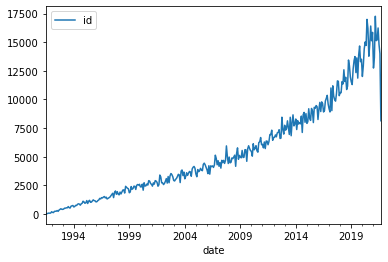

In [81]:
df.groupby('date')[['id']].count().plot()